In [1]:
import csv
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from IPython.display import clear_output

In [ ]:
reload(ann)

In [ ]:
[mln_sym.sess.run(item.oo, feed_dict=DSOCKET.get_feeder()) for item in mln_sym.LL[0].VN]

In [2]:
%run model_uniform.py
mln_sym.init_sess()
itr = 0

In [24]:
tf.reset_default_graph()
reload(ann)
%run model_uniform.py
mln_sym.init_sess()
itr = 0

In [ ]:
mln_sym.tune_weight(0, 4., mln_sym.sess)

In [ ]:
[mln_sym.sess.run(item, feed_dict=DSOCKET.get_feeder()) for item in mln_sym.LL[0].VN[0].ww]

In [ ]:
ccls = 0
steps = 1000
chunk = 100
start = itr
target = itr + steps*chunk
for itrl in range(steps):
    mln_sym.train(chunk, DSOCKET)
    itr += chunk
    ccls += 1
    if ccls > 10:
        clear_output()
        ccls = 0
    print(itr, (itr - start)/(steps*chunk))

In [ ]:
old_ann_data_learnset = ann_data_learnset

In [5]:
ann_data_learnset = mln_sym.calc(learnset, DSOCKET)
data_ann_learnset = np.array([learnset[item][1] for item in range(7)])
data_ann_learnset = data_ann_learnset.T

mgp

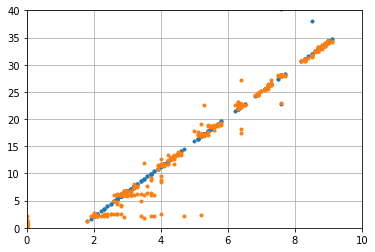

In [8]:
plt.figure()
plt.plot(data_ann_learnset[:, 2], ann_data_learnset[:, 0], '.')
plt.plot(data_ann_learnset[:, 2], data_ann_learnset[:, 3], '.')
plt.xlim(0,10)
plt.ylim(0,40)
plt.grid()
plt.show()

In [11]:
plt.figure()
plt.plot(data_ann_learnset[:, 2], ann_data_learnset[:, 0], '.')
plt.plot(data_ann_learnset[:, 2], old_ann_data_learnset[:, 0], '.')
plt.grid()
plt.show()

NameError: name 'old_ann_data_learnset' is not defined

op

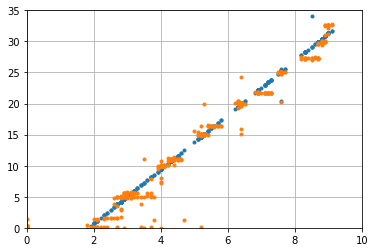

In [10]:
plt.figure()
plt.plot(data_ann_learnset[:, 2], ann_data_learnset[:, 1], '.')
plt.plot(data_ann_learnset[:, 2], data_ann_learnset[:, 4], '.')
plt.xlim(0,10)
plt.ylim(0,35)
plt.grid()
plt.show()

tet

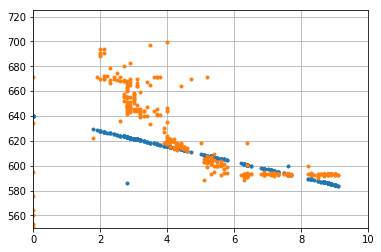

In [20]:
plt.figure()
plt.plot(data_ann_learnset[:, 2], ann_data_learnset[:, 2], '.')
plt.plot(data_ann_learnset[:, 2], data_ann_learnset[:, 5], '.')
plt.xlim(0,10)
plt.ylim(550, 725)
plt.grid()
plt.show()

es

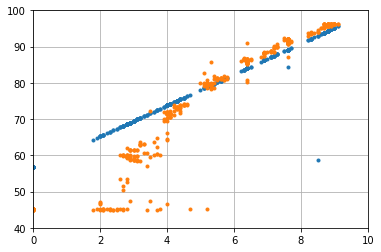

In [19]:
plt.figure()
plt.plot(data_ann_learnset[:, 2], ann_data_learnset[:, 3], '.')
plt.plot(data_ann_learnset[:, 2], data_ann_learnset[:, 6], '.')
plt.xlim(0,10)
plt.ylim(40,100)
plt.grid()
plt.show()

## collecting pictures

In [28]:
%rm -rf pic/*
%mkdir pic/gt-mgp
%mkdir pic/gt-op
%mkdir pic/gt-tet
%mkdir pic/gt-es

In [29]:
def get_pic():
    ann_data_learnset = mln_sym.calc(learnset, DSOCKET)
    data_ann_learnset = np.array([learnset[item][1] for item in range(7)])
    data_ann_learnset = data_ann_learnset.T

    plt.figure()
    plt.plot(data_ann_learnset[:, 2], ann_data_learnset[:, 0], '.')
    plt.plot(data_ann_learnset[:, 2], data_ann_learnset[:, 3], '.')
    plt.title('gt-mgp, itr={}'.format(itr))
    plt.xlabel('gt, kg/hr')
    plt.ylabel('mgp, kW')
    plt.xlim(0,10)
    plt.ylim(0,40)
    plt.grid()
    plt.savefig('pic/gt-mgp/gt-mgp-itr-{}.png'.format(itr))
    plt.close()

    plt.figure()
    plt.plot(data_ann_learnset[:, 2], ann_data_learnset[:, 1], '.')
    plt.plot(data_ann_learnset[:, 2], data_ann_learnset[:, 4], '.')
    plt.title('gt-op, itr={}'.format(itr))
    plt.xlabel('gt, kg/hr')
    plt.ylabel('op, kW')
    plt.xlim(0,10)
    plt.ylim(0,35)
    plt.grid()
    plt.savefig('pic/gt-op/gt-op-itr-{}.png'.format(itr))
    plt.close()

    plt.figure()
    plt.plot(data_ann_learnset[:, 2], ann_data_learnset[:, 2], '.')
    plt.plot(data_ann_learnset[:, 2], data_ann_learnset[:, 5], '.')
    plt.title('gt-tet, itr={}'.format(itr))
    plt.xlabel('gt, kg/hr')
    plt.ylabel('tet, degC')
    plt.xlim(0,10)
    plt.ylim(550, 725)
    plt.grid()
    plt.savefig('pic/gt-tet/gt-tet-itr-{}.png'.format(itr))
    plt.close()

    plt.figure()
    plt.plot(data_ann_learnset[:, 2], ann_data_learnset[:, 3], '.')
    plt.plot(data_ann_learnset[:, 2], data_ann_learnset[:, 6], '.')
    plt.title('gt-es, itr={}'.format(itr))
    plt.xlabel('gt, kg/hr')
    plt.ylabel('es, krpm/min')
    plt.xlim(0,10)
    plt.ylim(40,100)
    plt.grid()
    plt.savefig('pic/gt-es/gt-es-itr-{}.png'.format(itr))
    plt.close()

In [30]:
ccls = 0
steps = 200
chunk = 5000
start = itr
target = itr + steps*chunk
for itrl in range(steps):
    get_pic()
    mln_sym.train(chunk, DSOCKET)
    itr += chunk
    ccls += 1
    if ccls > 10:
        clear_output()
        ccls = 0
    print(itr, (itr - start)/(steps*chunk))

get_pic()

990000 0.99
995000 0.995
1000000 1.0


## importing (deprecated)

In [ ]:
data_learnset = np.array([])
with open('ann_data_uniform_indexed.csv') as datafile:
    reader = csv.reader(datafile)
    for row in reader:
        data_learnset = np.append(data_learnset, row)
data_learnset = data_learnset.astype(float)
data_learnset = data_learnset.reshape(489, 4)

In [ ]:
learnset_ind = np.array([])
with open('data_ann_uniform_indexed.csv') as datafile:
    reader = csv.reader(datafile)
    for row in reader:
        learnset_ind = np.append(learnset_ind, row)
learnset_ind = learnset_ind.astype(float)
learnset_ind = learnset_ind.reshape(7, 489)
learnset_ind = learnset_ind.T

In [ ]:
data_uniform = np.array([])
with open('data_ANN_uniform.csv') as datafile:
    reader = csv.reader(datafile)
    for row in reader:
        data_uniform = np.append(data_uniform, row)
data_uniform = data_uniform.astype(float)
data_uniform = data_uniform.reshape(700, 7)

MGP

In [ ]:
plt.figure()
plt.plot(learnset_ind[:, 2], data_learnset[:, 0], '.')
plt.plot(data_uniform[:, 2], data_uniform[:, 3]*0.001, '.')
plt.grid()
plt.show()

OP

In [ ]:
plt.figure()
plt.plot(learnset_ind[:, 2], data_learnset[:, 1], '.')
plt.plot(data_uniform[:, 2], data_uniform[:, 4]*0.001, '.')
plt.grid()
plt.show()

TET

In [ ]:
plt.figure()
plt.plot(learnset_ind[:, 2], data_learnset[:, 2], '.')
plt.plot(data_uniform[:, 2], data_uniform[:, 5], '.')
plt.grid()
plt.show()

In [ ]:
plt.figure()
plt.plot(learnset_ind[:, 2], data_learnset[:, 3], '.')
plt.plot(data_uniform[:, 2], data_uniform[:, 6]*0.001, '.')
plt.grid()
plt.show()